In [ ]:
import umap

import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import adjusted_rand_score as ARI
from sklearn.metrics import adjusted_mutual_info_score as AMI

from scipy import sparse
from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42 # enables correct plotting of text
rcParams['figure.figsize'] = (12,12)
import seaborn as sns

sc.settings.verbosity =0


import harmonypy as hm
# import scanorama
import matplotlib.pyplot as plt
import pandas as pd
import scanpy as sc
import scvi
from scib_metrics.nearest_neighbors import NeighborsResults, pynndescent
import scib_metrics

import pickle


import os
compute = True

import numpy as np
import pandas as pd
from scipy.sparse.csgraph import connected_components

import numpy as np
import pandas as pd
from scipy.sparse.csgraph import connected_components

# Ensure the directory for intermediate and final results exists
if not os.path.exists('CLISI_csv_PARTIAL'):
    os.makedirs('CLISI_csv_PARTIAL')
if not os.path.exists('CLISI_csv_FINAL'):
    os.makedirs('CLISI_csv_FINAL')
    
    
def binary_LISI(neigh, metadata):
    """
    Compute a binary version of the Local Inverse Simpson Index (LISI).

    :param neigh: A pynndescent object with the 'indices' attribute having shape (n_cells, n_neighbors)
    :param metadata: An array of shape (n_cells,) containing metadata labels for each cell
    :return: A numpy array of shape (n_cells,) with the binary LISI scores
    """
    n_cells = neigh.indices.shape[0]
    binary_lisi_scores = np.zeros(n_cells)

    for i in range(n_cells):
        center_label = metadata[i]
        neighbor_indices = neigh.indices[i]
        neighbor_labels = metadata[neighbor_indices]

        # Count how many neighbors have the same label as the center cell
        same_label_count = np.sum(neighbor_labels == center_label)
        
        # Compute the proportion of same label in the neighborhood
        binary_lisi_scores[i] = same_label_count / len(neighbor_indices)

    return binary_lisi_scores

def result_exists(mod, i, ann, n_size, ct):
    ct_sanitized = ct.replace('/', '_')  # Sanitize cell type name for use in filename
    filename = f'CLISI_csv_PARTIAL/scIB_{mod}_{i}_{ann}_BINARY_{n_size}_{ct_sanitized}.csv'
    return os.path.exists(filename), filename

def save_binary_lisi_scores(binary_lisi_scores, filename, valid_indices):
    temp_df = pd.DataFrame(binary_lisi_scores, index=valid_indices, columns=['binary_LISI'])
    print(temp_df.shape)

    temp_df.to_csv(filename)



/home/macera/.conda/envs/scanpy/lib/python3.9/site-packages/scvi/__init__.py:31: DeprecationWarning: scvi is deprecated, please uninstall scvi via `pip uninstall scvi` and install the new scvi-tools package at github.com/YosefLab/scvi-tools
  warnings.warn(deprecation_msg, DeprecationWarning)


# Generating the plot


In [ ]:
adata = sc.read('objects/RNA_STWG_final.h5ad')
  
# Assuming 'threshold' is defined somewhere in your code
latents = ['scVI']#'Harmony','Unintegrated','Scanorama',
kbet_label = {}
batch = 'sample'
graph_label = {}
threshold = 0.5  # Example threshold

In [4]:
l1_colors = {
'ATL': '#1f77b4',
  'PT_VCAM1': '#c5b0d5',
 'CNT': '#ff7f0e',
 'DCT': '#279e68',
  'DCT1': '#279e68',
 'DCT2': '#ffb500',
 'DTL': '#d62728',
 'EC': '#aa40fc',
 'ENDO': '#aa40fc',
 'FIB': '#8c564b',
 'IC': '#e377c2',
 'ICA': '#e377c2',
 'ICB': '#7b4f4b',
 'IMM': '#b5bd61',
 'LEUK': '#b5bd61',
 'NEU': '#17becf',
 'PC': '#aec7e8',
 'PEC': '#17becf',
 'POD': '#98df8a',
 'PODO': '#98df8a',
'PT': '#ff9896',
 'PapE': '#c5b0d5',
 'TAL': '#c49c94',
'MES': '#f7b6d2',
 'VSM/P': '#f7b6d2','Unclassified':'#d3d3d3'}

In [5]:
l3_colors = {
'ATL': '#ffff00',
 'B': '#1ce6ff',
 'C-TAL': '#ff34ff',
 'PC': '#aec7e8',
 'CCD-IC-A': '#ff4a46',
 'CCD-PC': '#008941',
 'CNT': '#006fa6',
 'CNT-IC-A': '#a30059',
 'CNT-PC': '#ffdbe5',
 'DCT1': '#7a4900',
 'DCT2': '#0000a6',
 'DTL': '#63ffac',
 'EC-AEA': '#b79762',
 'EC-AVR': '#004d43',
 'EC-DVR': '#8fb0ff',
 'EC-GC': '#997d87',
 'EC-LYM': '#5a0007',
 'EC-PTC': '#809693',
 'FIB': '#6a3a4c',
 'IC-B': '#1b4400',
 'IMCD': '#4fc601',
 'M-FIB': '#3b5dff',
 'M-TAL': '#4a3b53',
 'MAC-M2': '#ff2f80',
 'MAST': '#61615a',
 'MC': '#ba0900',
 'MD': '#6b7900',
 'MDC': '#00c2a0',
 'MYOF': '#ffaa92',
 'N': '#ff90c9',
 'NEU': '#b903aa',
 'NKC/T': '#d16100',
 'OMCD-IC-A': '#ddefff',
 'OMCD-PC': '#000035',
 'PEC': '#7b4f4b',
 'PL': '#a1c299',
 'POD': '#300018',
 'PT-S1/2': '#0aa6d8',
 'PT-S3': '#013349',
 'PapE': '#00846f',
 'REN': '#372101',
 'T': '#ffb500',
 'VSMC': '#c2ffed',
 'VSMC/P': '#a079bf',
 'aFIB': '#cc0744',
 'aPT': '#c0b9b2',
 'aTAL1': '#c2ff99',
 'aTAL2': '#001e09',
 'cDC': '#00489c',
 'cycCNT': '#6f0062',
 'cycDCT': '#0cbd66',
 'cycEC': '#eec3ff',
 'cycMNP': '#456d75',
 'cycMYOF': '#b77b68',
 'cycNKC/T': '#7a87a1',
 'cycPT': '#788d66',
 'dC-IC-A': '#885578',
 'dC-TAL': '#fad09f',
 'dCNT': '#ff8a9a',
 'dDCT': '#d157a0',
 'dEC': '#bec459',
 'dEC-PTC': '#456648',
 'dFIB': '#0086ed',
 'dIMCD': '#886f4c',
 'dM-FIB': '#34362d',
 'dM-TAL': '#b4a8bd',
 'dOMCD-PC': '#00a6aa',
 'dPT': '#452c2c',
 'dVSMC': '#636375',
 'ncMON': '#a3c8c9',
 'pDC': '#ff913f',
 'tPC-IC': '#938a81','Unclassified':'#d3d3d3'}

In [ ]:
from scipy.stats import hmean
from scipy.spatial import distance



def compute_cell_type_centers(adata, cell_type_column='celltype', n_pcs=20):
    """
    Compute cell type centers using specified representation and PCs.
    """
    cell_type_centers = {}
    # print(adata,cell_type_column)
    for cell_type in adata.obs[cell_type_column].unique():
        cell_type_data = adata[adata.obs[cell_type_column] == cell_type]
        center = np.mean(cell_type_data.obsm['X_pca'][:, :n_pcs], axis=0)
        cell_type_centers[cell_type] = center
    return cell_type_centers

def cosine_distance(v1, v2):
    numerator = np.dot(np.mean(v1, axis = 0), np.mean(v2, axis = 0))
    denominator = np.linalg.norm(np.mean(v1, axis = 0)) * np.linalg.norm(np.mean(v2, axis = 0))
    return 1 - numerator / denominator

# Now, cov_matrix can be used to compute Mahalanobis distance

def euclidean_distance(v1, v2):
    """
    Calculate the Euclidean distance between two vectors.

    Parameters:
    - v1 (np.array): First vector.
    - v2 (np.array): Second vector.

    Returns:
    - float: The Euclidean distance.
    """
    # Calculate the difference vector
    diff = np.mean(v1, axis = 0) - np.mean(v2, axis = 0)
    
    # Compute the Euclidean distance
    dist = np.linalg.norm(diff)
    
    return dist

from scipy.stats import chi2
import numpy as np
import scipy.stats as stats



from sklearn.covariance import LedoitWolf


def unidirectional_mahalanobis_distance(v1, v2):
    """
    Calculate a directional Mahalanobis distance between one distribution and the centroid of the other,
    represented by the matrices v1 and v2, using their v1 covariance matrices.

    Parameters:
    - v1 (np.array): Matrix representing the first distribution, shape (n_obs1, n_features).
    - v2 (np.array): Matrix representing the second distribution, shape (n_obs2, n_features).
    
    Returns:
    - float: The composite Mahalanobis distance between the centroids of v1 and v2.
    """
    # Calculate the mean vectors of v1 and v2
    mean_v1 = np.mean(v1, axis=0)
    mean_v2 = np.mean(v2, axis=0)

    # Calculate the covariance matrices for v1 and v2
    # cov_v1 = np.cov(v1, rowvar=False)
    # cov_v2 = np.cov(v2, rowvar=False)
    lw = LedoitWolf()
    cov_v1 = lw.fit(v1).covariance_
    # cov_v2 = np.cov(v2, rowvar=False)

    # Calculate the inverse of the covariance matrices
    try:
        inv_cov_v1 = np.linalg.inv(cov_v1)
    except:
        return 0
    # inv_cov_v2 = np.linalg.inv(cov_v2)

    # Calculate the differences of the mean vectors
    delta = mean_v1 - mean_v2

    # Calculate Mahalanobis distance using each covariance matrix
    distance_v1 = np.sqrt(np.dot(np.dot(delta, inv_cov_v1), delta.T))
    # distance_v2 = np.sqrt(np.dot(np.dot(delta, inv_cov_v2), delta.T))

    # Composite distance can be the average of these two distances
    # composite_distance = (distance_v1 + distance_v2) / 2

    return distance_v1


def compute_distances_matrix(embedding, labels,n_cells=100, distance_function = cosine_distance, random_state =  np.random.randint(0,100)):
    unique_classes = np.unique(labels)
    distance_matrix = np.zeros((len(unique_classes), len(unique_classes)))
    for i, cls_i in enumerate(unique_classes):
        indices_i = np.where(labels == cls_i)[0]
        if len(indices_i) > n_cells:
            indices_i = sc.pp.subsample(indices_i, n_obs = n_cells, random_state = random_state)[0]
        for j, cls_j in enumerate(unique_classes):
            # print(cls_i,cls_j)
            if cls_i==cls_j:
                continue
            else:
                indices_j = np.where(labels == cls_j)[0]
                if len(indices_j) > n_cells:
                    indices_j = sc.pp.subsample(indices_j, n_obs = n_cells)[0]
                distance = distance_function(embedding[indices_i], embedding[indices_j])
            
                distance_matrix[i,j] = distance
                    
    return pd.DataFrame(distance_matrix, index = unique_classes, columns = unique_classes)

def symmetric_harmonic_mean(df):
    n_cols = df.shape[1]
    harmonic_means = pd.DataFrame(np.zeros((n_cols, n_cols)), columns=df.columns, index=df.columns)
    
    # Iterate over each pair of columns
    for i in range(n_cols):
        for j in range(i, n_cols):
            if i != j:
                try:
                    # Calculate the harmonic mean for each element pair-wise
                    val = hmean([df.iloc[i, j],df.iloc[i, j]])  # Adding a small number to avoid division by zero
                    harmonic_means.iloc[i, j] = val
                    harmonic_means.iloc[j, i] = val  # Ensure the matrix is symmetric
                except ZeroDivisionError:
                    # Handle division by zero if any values are exactly zero
                    harmonic_means.iloc[i, j] = np.nan
                    harmonic_means.iloc[j, i] = np.nan
    
    return harmonic_means

In [ ]:
mods = ['RNA_STWG','scRNA','scRNA5p','snRNA','snATAC','snMultiome']

In [ ]:
levels = ['Deepscore_HCA_l1_Clean', 'Deepscore_HCA_l3_Clean']#, 'Deepscore_HCA_l1_Full']
representations = {'Batch_Corr_Merged': 'scVI'}
distance_dict = {}
adata = sc.read(f'../HORIZONTAL_RNA/objects/RNA_STWG_final.h5ad')

In [ ]:
Sorted_L1_Clean = ['IC','TAL','DCT','CNT','PC','PT','PEC','POD','EC','VSM/P', 'FIB','IMM']
Sorted_L2_Clean = []
for ct in Sorted_L1_Clean:
    Sorted_L2_Clean = Sorted_L2_Clean + list(sorted(set(adata[adata.obs['Deepscore_HCA_l1_Clean'].isin([ct])].obs['Deepscore_HCA_l3_Clean'].unique())))
Sorted_L1_Clean_Epi = ['IC','TAL','DCT','CNT','PC','PT','PEC','POD']
Sorted_L2_Clean_Epi = []
for ct in Sorted_L1_Clean_Epi:
    Sorted_L2_Clean_Epi = Sorted_L2_Clean_Epi + list(sorted(set(adata[adata.obs['Deepscore_HCA_l1_Clean'].isin([ct])].obs['Deepscore_HCA_l3_Clean'].unique())))

Sorted_L1_Clean_Endo = ['EC','VSM/P', 'FIB']
Sorted_L2_Clean_Endo = []
for ct in Sorted_L1_Clean_Endo:
    Sorted_L2_Clean_Endo = Sorted_L2_Clean_Endo + list(sorted(set(adata[adata.obs['Deepscore_HCA_l1_Clean'].isin([ct])].obs['Deepscore_HCA_l3_Clean'].unique())))

In [ ]:
base_size=(2, 2)
font_scale=8.5

In [ ]:
mods = ['snRNA', 'scRNA5p', 'scRNA']
levels = ['Deepscore_HCA_l1_Clean', 'Deepscore_HCA_l3_Clean']#, 'Deepscore_HCA_l1_Full']
representations = { 'Batch_Corr_Merged': 'scVI'}#,'Sample': 'X_pca', 'Merged': 'Unintegrated',}
distance_dict = {}

adata = sc.read(f'../HORIZONTAL_RNA/objects/byTech/{mods[0]}.h5ad')
no_var=True
for mod in mods:
    adata = sc.read(f'../HORIZONTAL_RNA/objects/byTech/{mod}.h5ad')
    print(mod)
    distance_dict[mod] = {}
    for level in levels:
        print(level)
        distance_dict[mod][level] = {}
        for context, rep in representations.items():
            distance_dict[mod][level][context] = compute_distances_matrix(adata.obsm[rep], adata.obs[level], n_cells= 500000, distance_function = unidirectional_mahalanobis_distance, random_state= 42)
    with open(f'results/distance_dicts/{mod}_Unidir.pkl', 'wb') as fp:
        pickle.dump(distance_dict, fp)

In [ ]:

mod = 'RNA_STWG'

Sorted_L1_Clean = ['IC','TAL','DCT','CNT','PC','PT','PEC','POD','EC','VSM/P', 'FIB','IMM']
Sorted_L2_Clean = []
for ct in Sorted_L1_Clean:
    Sorted_L2_Clean = Sorted_L2_Clean + list(sorted(set(adata[adata.obs['Deepscore_HCA_l1_Clean'].isin([ct])].obs['Deepscore_HCA_l3_Clean'].unique())))
no_var = True
print(mod)
distance_dict[mod] = {}
for level in levels:
    print(level)
    distance_dict[mod][level] = {}
    for context, rep in representations.items():
        distance_dict[mod][level][context] = compute_distances_matrix(adata.obsm[rep], adata.obs[level], n_cells= 500000, distance_function = unidirectional_mahalanobis_distance, random_state= 42)
        for sub_mod in ['snRNA', 'scRNA5p', 'scRNA']:
            distance_dict[mod][level][f'{context}_{sub_mod}'] = compute_distances_matrix(adata[adata.obs['batch'].isin([sub_mod])].obsm[rep], adata[adata.obs['batch'].isin([sub_mod])].obs[level], n_cells= 500000, distance_function = unidirectional_mahalanobis_distance, random_state= 42)
with open(f'results/distance_dicts/{mod}_Unidir.pkl', 'wb') as fp:
    pickle.dump(distance_dict, fp)

scRNA
Batch_Corr_Merged


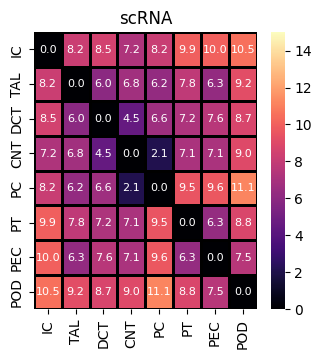

scRNA5p
Batch_Corr_Merged


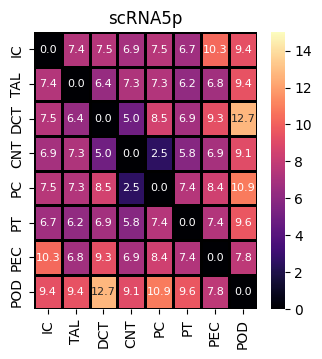

snRNA
Batch_Corr_Merged


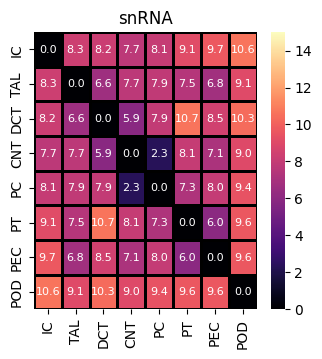

RNA_STWG
Batch_Corr_Merged


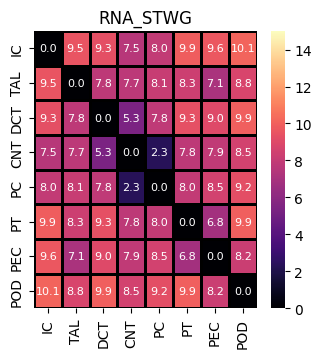

Batch_Corr_Merged_snRNA


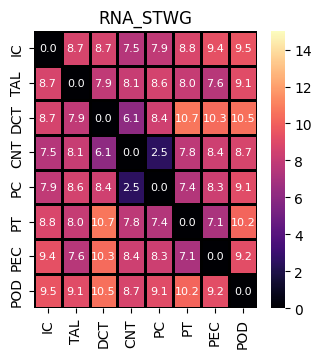

Batch_Corr_Merged_scRNA5p


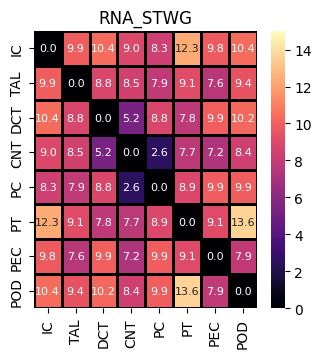

Batch_Corr_Merged_scRNA


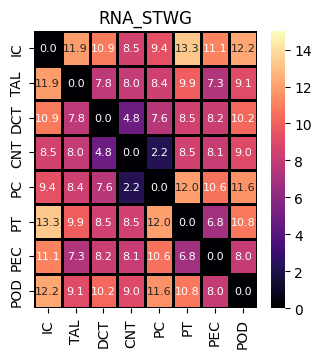

In [ ]:
for mod in mods:
    print(mod)
    with open(f'results/distance_dicts/{mod}_Unidir.pkl', 'rb') as f:
        distance_dict = pickle.load(f)
        for level in levels:
            # distance_dict[mod][level]['Sample_Median'] = compute_median_sample_distance(distance_dict[mod][level])
            if level == 'Deepscore_HCA_l1_Clean':
                cell_types = Sorted_L1_Clean
            else:
                cell_types = Sorted_L2_Clean
            for key in distance_dict[mod][level].keys():
                print(key)
                key_name = key.split('_')[-1]
                level_name = level.replace('Deepscore_HCA_l','L')
                img_size = int(distance_dict[mod][level][key].shape[0]/2)
                rcParams['figure.figsize'] = (img_size,img_size)
                df = distance_dict[mod][level][key]
                df = df.reindex(index=cell_types, columns=cell_types)
                mask = df == pd.NA
                df = df.fillna(0)
                df = symmetric_harmonic_mean(df)
                rows, cols = df.shape
                figsize = (base_size[0] + cols * 0.5, base_size[1] + rows * 0.5)

                # Adjust the font size based on the number of rows and columns
                font_size = max(font_scale - int((rows + cols) / 15), 8)  # Ensure minimum font size of 8

                rcParams['figure.figsize'] = figsize
                sns.heatmap(df.astype(float), cmap = 'magma', vmin=0,vmax= 15,linewidths=1,linecolor='black', cbar=False, annot=True, fmt= '.1f', annot_kws={"size": font_size})
                # sns.heatmap(df.astype(float), cmap = 'magma', vmin=0,vmax= 15,mask = ~mask, linewidths=.01, linecolor='gray')
                # plt.title(f'MAHALANOBIS DISTANCE - {mod} - {level_name} - {key_name}')
                plt.title(f'{key}')
                plt.savefig(f'figures/Distance_matrices/Symmetric/General/{mod}_{level_name}_{key_name}.png', bbox_inches='tight', dpi = 150)
                plt.close()

                for subset in ['Epi']:#,'Endo']:
                    if subset == 'Epi':
                        if level == 'Deepscore_HCA_l1_Clean':
                            celltypes = Sorted_L1_Clean_Epi
                        else:
                            celltypes = Sorted_L2_Clean_Epi
                    if subset == 'Endo':
                        if level == 'Deepscore_HCA_l1_Clean':
                            celltypes = Sorted_L1_Clean_Endo
                        else:
                            celltypes = Sorted_L2_Clean_Endo
                    df = distance_dict[mod][level][key]

                    df = df.reindex(index=celltypes, columns=celltypes)
                    df = symmetric_harmonic_mean(df)
                    rows, cols = df.shape
                    figsize = (base_size[0] + cols * 0.2, base_size[1] + rows * 0.2)

                    # Adjust the font size based on the number of rows and columns
                    font_size = max(font_scale - int((rows + cols) / 15), 8)  # Ensure minimum font size of 8

                    rcParams['figure.figsize'] = figsize
                    sns.heatmap(df.astype(float), cmap = 'magma', vmin=0,vmax= 15,linewidths=1,linecolor='black', cbar=True, annot=True,annot_kws={"size": font_size}, fmt= '.1f')
                    # sns.heatmap(df.astype(float), cmap = 'magma', vmin=0,vmax= 15,mask = ~mask, linewidths=.01, linecolor='gray')
                    # plt.title(f'MAHALANOBIS DISTANCE - {mod} - {level_name} - {subset}')
                    plt.title(f'{mod}')

                    plt.savefig(f'figures/Distance_matrices/Symmetric/{subset}/{mod}_{level_name}_{subset}_{key}.png', bbox_inches='tight', dpi = 600)
                    plt.savefig(f'figures/Distance_matrices/Symmetric/{subset}/{mod}_{level_name}_{subset}_{key}.pdf', bbox_inches='tight', dpi = 300)

                    plt.show()
                    ### IN CASE YOU WANT L3 SUBTYPES PLOTS
                    # if level == 'Deepscore_HCA_l1_Clean': 
                    #     level_= 'Deepscore_HCA_l3_Clean'
                    #     for celltype in celltypes:
                    #         celltype_name = celltype.replace('/','')
                    #         celltypes_ = list(sorted(set(adata[adata.obs['Deepscore_HCA_l1_Clean'].isin([celltype])].obs['Deepscore_HCA_l3_Clean'].unique())))
                    #         df = distance_dict[mod][level_][key]
                    #         df = df.reindex(index=celltypes_, columns=celltypes_, fill_value=np.nan)
                    #         mask = df == pd.NA
                    #         df = df.fillna(0)
                    #         df = symmetric_harmonic_mean(df)
                    #         rows, cols = df.shape
                    #         figsize = (base_size[0] + cols * 0.5, base_size[1] + rows * 0.5)

                    #         # Adjust the font size based on the number of rows and columns
                    #         font_size = max(font_scale - int((rows + cols) / 15), 8)  # Ensure minimum font size of 8

                    #         rcParams['figure.figsize'] = figsize
                    #         sns.heatmap(df.astype(float), cmap = 'magma', vmin=0,vmax= 15,linewidths=1,linecolor='black', cbar=False, annot=True, fmt= '.2f',annot_kws={"size": font_size})
                    #         # sns.heatmap(df.astype(float), cmap = 'magma', vmin=0,vmax = 15,mask = ~mask, linewidths=.01, linecolor='gray')
                    #         plt.title(f'MAHALANOBIS DISTANCE - {mod} - {celltype} Subtypes')
                    #         plt.savefig(f'figures/Distance_matrices/Symmetric/Subtypes/{mod}_{level_name}_{celltype_name}.png', bbox_inches='tight', dpi = 150)
                    #         plt.show()

scRNA
Batch_Corr_Merged
[[1.00000000e+00 4.20879366e-06 7.31774322e-07 4.48095943e-04
  5.32705922e-06 8.88225576e-11 4.41984656e-11 7.86105683e-13]
 [4.20879366e-06 1.00000000e+00 3.51452935e-02 2.93819272e-03
  1.70641448e-02 3.65008910e-05 1.49291576e-02 1.76832217e-08]
 [7.31774322e-07 3.51452935e-02 1.00000000e+00 4.33733717e-01
  4.42168896e-03 6.19939809e-04 9.20374683e-05 2.17726783e-07]
 [4.48095943e-04 2.93819272e-03 4.33733717e-01 1.00000000e+00
  9.93907581e-01 9.78806883e-04 9.24440723e-04 5.61837578e-08]
 [5.32705922e-06 1.70641448e-02 4.42168896e-03 9.93907581e-01
  1.00000000e+00 1.45794149e-09 6.54397068e-10 4.32824721e-15]
 [8.88225576e-11 3.65008910e-05 6.19939809e-04 9.78806883e-04
  1.45794149e-09 1.00000000e+00 1.41140810e-02 1.21550424e-07]
 [4.41984656e-11 1.49291576e-02 9.20374683e-05 9.24440723e-04
  6.54397068e-10 1.41140810e-02 1.00000000e+00 1.38483346e-04]
 [7.86105683e-13 1.76832217e-08 2.17726783e-07 5.61837578e-08
  4.32824721e-15 1.21550424e-07 1.38483

/tmp/ipykernel_6406/3209961735.py:110: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


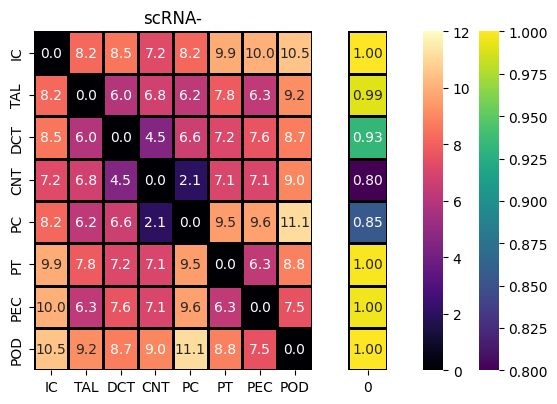

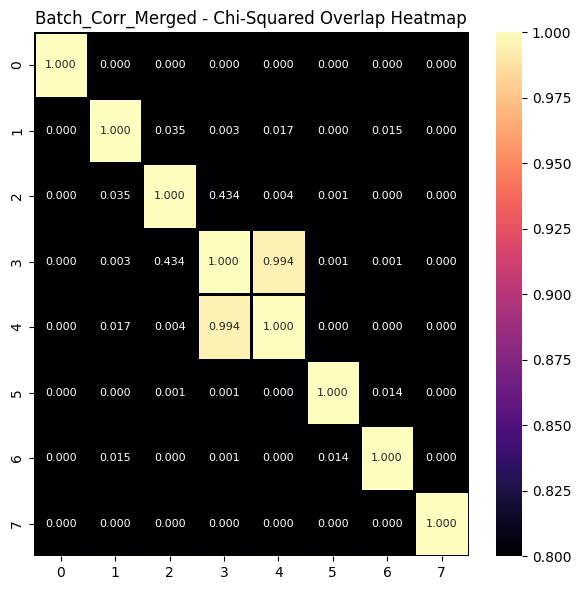

scRNA5p
Batch_Corr_Merged
[[1.00000000e+00 2.37553547e-04 1.87307655e-04 1.90201176e-03
  1.43582031e-04 3.70851484e-03 5.05598376e-12 4.70690787e-09]
 [2.37553547e-04 1.00000000e+00 1.14238008e-02 4.18851994e-04
  3.24844858e-04 1.93811809e-02 3.03160257e-03 3.70955034e-09]
 [1.87307655e-04 1.14238008e-02 1.00000000e+00 2.56947878e-01
  7.95221048e-07 2.12387171e-03 6.22382182e-09 7.54283423e-22]
 [1.90201176e-03 4.18851994e-04 2.56947878e-01 1.00000000e+00
  9.79624710e-01 5.67578597e-02 1.61698009e-03 2.66003923e-08]
 [1.43582031e-04 3.24844858e-04 7.95221048e-07 9.79624710e-01
  1.00000000e+00 1.96269127e-04 1.45346898e-06 3.93862581e-14]
 [3.70851484e-03 1.93811809e-02 2.12387171e-03 5.67578597e-02
  1.96269127e-04 1.00000000e+00 2.68497354e-04 8.20242746e-10]
 [5.05598376e-12 3.03160257e-03 6.22382182e-09 1.61698009e-03
  1.45346898e-06 2.68497354e-04 1.00000000e+00 4.34063552e-05]
 [4.70690787e-09 3.70955034e-09 7.54283423e-22 2.66003923e-08
  3.93862581e-14 8.20242746e-10 4.340

/tmp/ipykernel_6406/3209961735.py:110: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


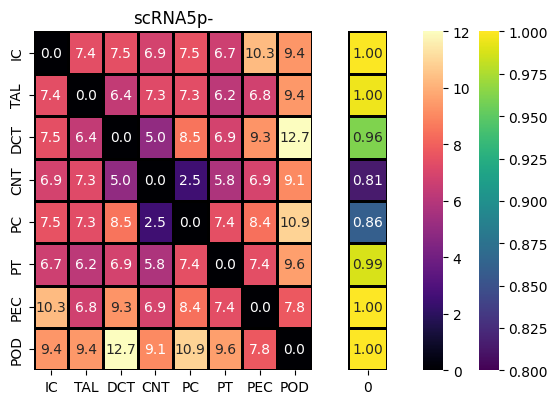

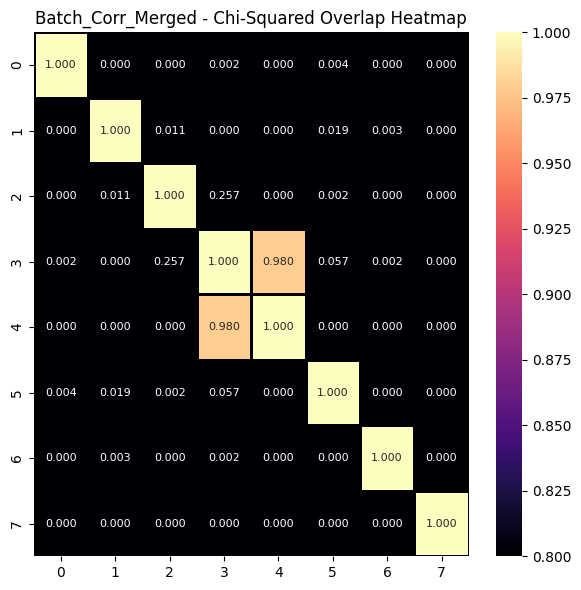

snRNA
Batch_Corr_Merged
[[1.00000000e+00 2.70950498e-06 3.95275575e-06 5.67360766e-05
  8.99767500e-06 2.58203005e-08 4.66178501e-10 3.07821830e-13]
 [2.70950498e-06 1.00000000e+00 4.55570348e-03 5.96803826e-05
  2.89178585e-05 1.65192101e-04 2.95133398e-03 3.09513266e-08]
 [3.95275575e-06 4.55570348e-03 1.00000000e+00 4.35240462e-02
  1.85357411e-05 2.57095720e-13 1.18339326e-06 3.82489660e-12]
 [5.67360766e-05 5.96803826e-05 4.35240462e-02 1.00000000e+00
  9.88630235e-01 1.06650998e-05 7.86419716e-04 4.58384943e-08]
 [8.99767500e-06 2.89178585e-05 1.85357411e-05 9.88630235e-01
  1.00000000e+00 4.22998850e-04 1.45478208e-05 2.68190624e-09]
 [2.58203005e-08 1.65192101e-04 2.57095720e-13 1.06650998e-05
  4.22998850e-04 1.00000000e+00 3.44266274e-02 6.60032578e-10]
 [4.66178501e-10 2.95133398e-03 1.18339326e-06 7.86419716e-04
  1.45478208e-05 3.44266274e-02 1.00000000e+00 6.32101346e-10]
 [3.07821830e-13 3.09513266e-08 3.82489660e-12 4.58384943e-08
  2.68190624e-09 6.60032578e-10 6.32101

/tmp/ipykernel_6406/3209961735.py:110: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


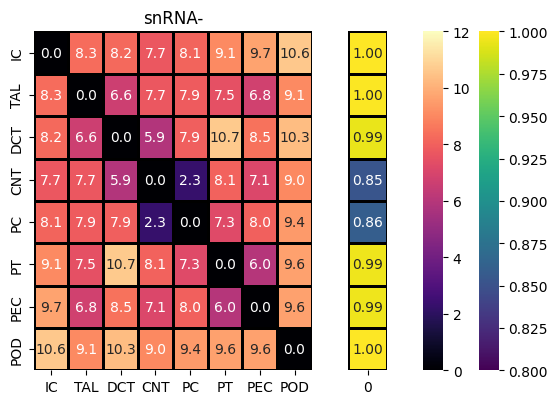

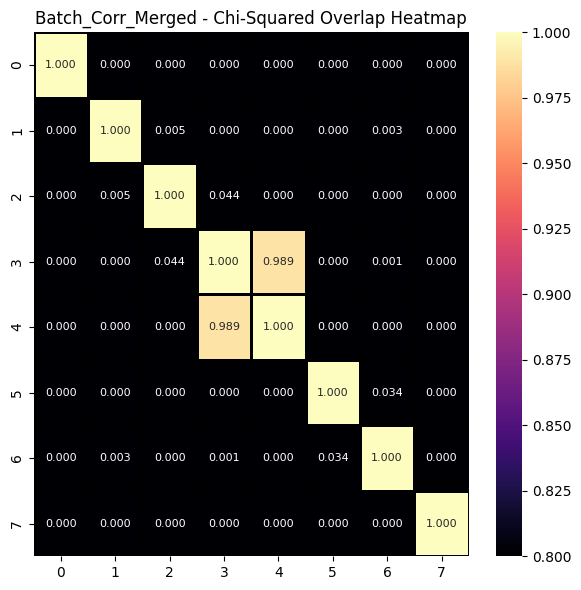

RNA_STWG
Batch_Corr_Merged
[[1.00000000e+00 1.26756571e-09 7.83692507e-09 1.32472277e-04
  1.64015696e-05 1.17764506e-10 6.97247040e-10 2.17931111e-11]
 [1.26756571e-09 1.00000000e+00 3.98225294e-05 5.27240887e-05
  8.61051817e-06 3.00848762e-06 9.47182805e-04 2.06698564e-07]
 [7.83692507e-09 3.98225294e-05 1.00000000e+00 1.36921475e-01
  3.64643586e-05 4.72138299e-09 4.04163334e-08 8.71951467e-11]
 [1.32472277e-04 5.27240887e-05 1.36921475e-01 1.00000000e+00
  9.88527587e-01 4.13896404e-05 2.27133970e-05 8.59192346e-07]
 [1.64015696e-05 8.61051817e-06 3.64643586e-05 9.88527587e-01
  1.00000000e+00 1.63675851e-05 8.45601905e-07 1.03233388e-08]
 [1.17764506e-10 3.00848762e-06 4.72138299e-09 4.13896404e-05
  1.63675851e-05 1.00000000e+00 2.33661370e-03 7.56978944e-11]
 [6.97247040e-10 9.47182805e-04 4.04163334e-08 2.27133970e-05
  8.45601905e-07 2.33661370e-03 1.00000000e+00 4.46319601e-06]
 [2.17931111e-11 2.06698564e-07 8.71951467e-11 8.59192346e-07
  1.03233388e-08 7.56978944e-11 4.46

/tmp/ipykernel_6406/3209961735.py:110: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


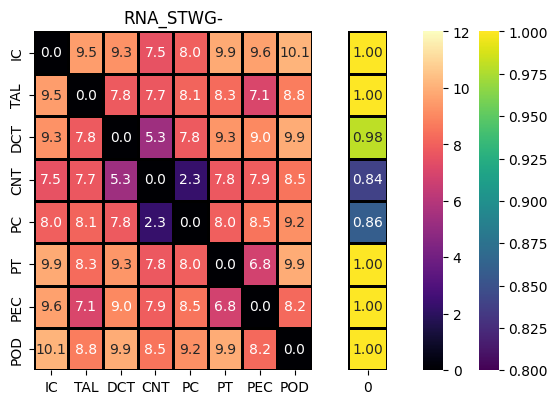

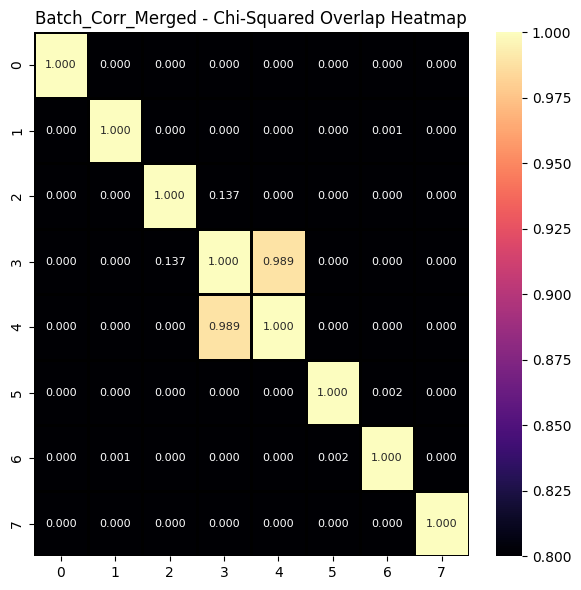

Batch_Corr_Merged_snRNA
[[1.00000000e+00 3.26575854e-07 3.84378597e-07 1.67445257e-04
  2.66441351e-05 1.59964849e-07 4.03181926e-09 1.44926755e-09]
 [3.26575854e-07 1.00000000e+00 2.56097107e-05 7.55089118e-06
  5.31784027e-07 1.20078948e-05 1.18670263e-04 2.50975091e-08]
 [3.84378597e-07 2.56097107e-05 1.00000000e+00 2.61475125e-02
  1.53948960e-06 2.13349538e-13 3.84177614e-12 8.38026806e-13]
 [1.67445257e-04 7.55089118e-06 2.61475125e-02 1.00000000e+00
  9.82046969e-01 4.01063678e-05 2.01633856e-06 2.80973442e-07]
 [2.66441351e-05 5.31784027e-07 1.53948960e-06 9.82046969e-01
  1.00000000e+00 2.07276485e-04 2.71384104e-06 2.70267160e-08]
 [1.59964849e-07 1.20078948e-05 2.13349538e-13 4.01063678e-05
  2.07276485e-04 1.00000000e+00 9.65328707e-04 1.36677398e-11]
 [4.03181926e-09 1.18670263e-04 3.84177614e-12 2.01633856e-06
  2.71384104e-06 9.65328707e-04 1.00000000e+00 1.57379997e-08]
 [1.44926755e-09 2.50975091e-08 8.38026806e-13 2.80973442e-07
  2.70267160e-08 1.36677398e-11 1.57379

/tmp/ipykernel_6406/3209961735.py:110: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


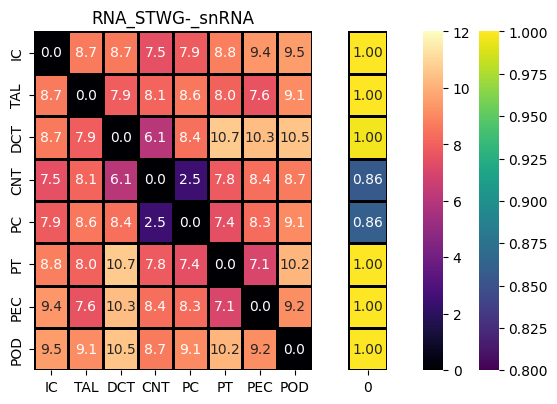

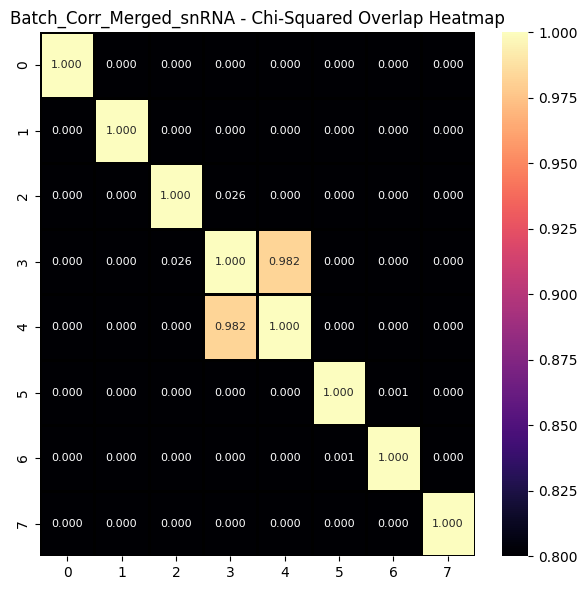

Batch_Corr_Merged_scRNA5p
[[1.00000000e+00 1.11774692e-10 2.57755391e-12 6.21782700e-08
  2.53538136e-06 4.56414495e-20 2.25770809e-10 2.66017291e-12]
 [1.11774692e-10 1.00000000e+00 1.65781578e-07 1.02725773e-06
  2.66394747e-05 2.65882850e-08 1.10361128e-04 2.90080327e-09]
 [2.57755391e-12 1.65781578e-07 1.00000000e+00 1.71373171e-01
  1.59799736e-07 4.03220284e-05 8.60689380e-11 9.43517935e-12]
 [6.21782700e-08 1.02725773e-06 1.71373171e-01 1.00000000e+00
  9.77880901e-01 6.02371942e-05 5.31376192e-04 1.78506220e-06]
 [2.53538136e-06 2.66394747e-05 1.59799736e-07 9.77880901e-01
  1.00000000e+00 1.09327002e-07 1.31546176e-10 1.00941876e-10]
 [4.56414495e-20 2.65882850e-08 4.03220284e-05 6.02371942e-05
  1.09327002e-07 1.00000000e+00 3.05585393e-08 3.93481423e-26]
 [2.25770809e-10 1.10361128e-04 8.60689380e-11 5.31376192e-04
  1.31546176e-10 3.05585393e-08 1.00000000e+00 2.66320977e-05]
 [2.66017291e-12 2.90080327e-09 9.43517935e-12 1.78506220e-06
  1.00941876e-10 3.93481423e-26 2.663

/tmp/ipykernel_6406/3209961735.py:110: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


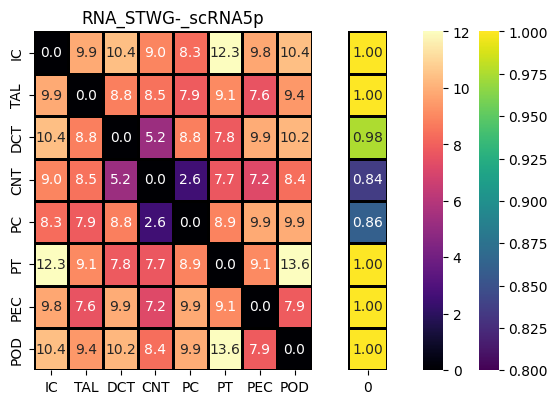

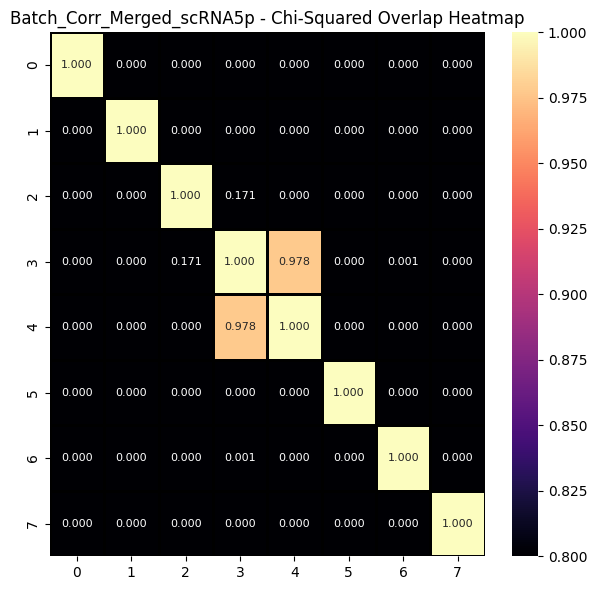

Batch_Corr_Merged_scRNA
[[1.00000000e+00 2.94270987e-18 4.16425731e-14 8.30120764e-07
  4.05426269e-09 1.61122384e-24 5.09500478e-15 1.72876161e-19]
 [2.94270987e-18 1.00000000e+00 4.44517114e-05 1.41366051e-05
  1.91907881e-06 1.34469395e-10 3.85981861e-04 2.30744741e-08]
 [4.16425731e-14 4.44517114e-05 1.00000000e+00 3.09422416e-01
  1.01481227e-04 1.06686165e-06 6.02468580e-06 6.93593222e-12]
 [8.30120764e-07 1.41366051e-05 3.09422416e-01 1.00000000e+00
  9.90516489e-01 1.02734343e-06 8.37544752e-06 4.38386300e-08]
 [4.05426269e-09 1.91907881e-06 1.01481227e-04 9.90516489e-01
  1.00000000e+00 1.42035936e-18 4.95466347e-13 8.64632355e-17]
 [1.61122384e-24 1.34469395e-10 1.06686165e-06 1.02734343e-06
  1.42035936e-18 1.00000000e+00 2.79459047e-03 1.15491132e-13]
 [5.09500478e-15 3.85981861e-04 6.02468580e-06 8.37544752e-06
  4.95466347e-13 2.79459047e-03 1.00000000e+00 1.13835889e-05]
 [1.72876161e-19 2.30744741e-08 6.93593222e-12 4.38386300e-08
  8.64632355e-17 1.15491132e-13 1.13835

/tmp/ipykernel_6406/3209961735.py:110: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


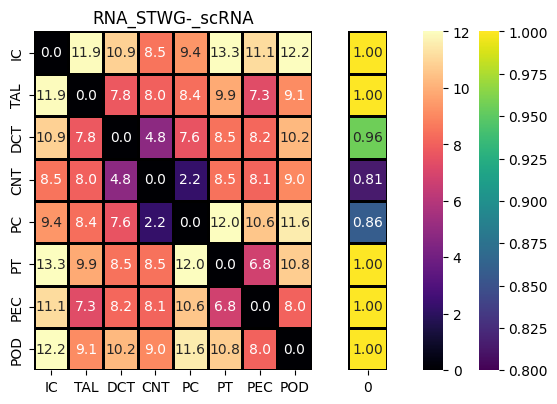

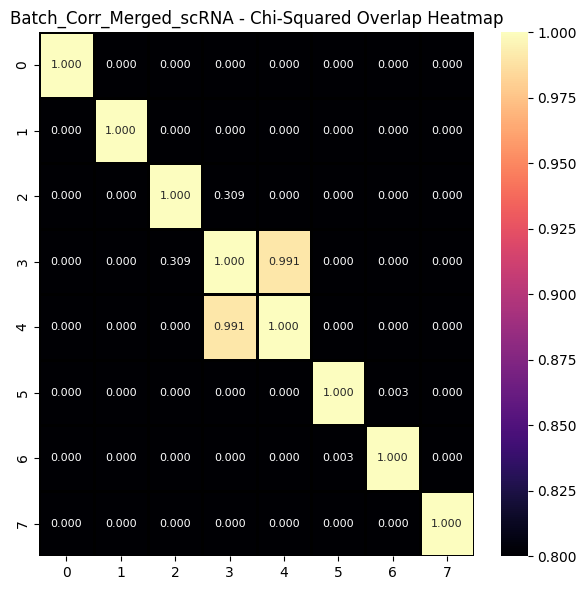

In [ ]:
from matplotlib.gridspec import GridSpec
from scipy.stats import chi2
for mod in mods:
    print(mod)
    with open(f'results/distance_dicts/{mod}_Unidir.pkl', 'rb') as f:
        distance_dict = pickle.load(f)
        for level in levels:
            # distance_dict[mod][level]['Sample_Median'] = compute_median_sample_distance(distance_dict[mod][level])
            if level == 'Deepscore_HCA_l1_Clean':
                cell_types = Sorted_L1_Clean
            else:
                cell_types = Sorted_L2_Clean
            for key in distance_dict[mod][level].keys():
                print(key)
                key_name = key.split('_')[-1]
                level_name = level.replace('Deepscore_HCA_l','L')
                img_size = int(distance_dict[mod][level][key].shape[0]/2)
                rcParams['figure.figsize'] = (img_size,img_size)
                df = distance_dict[mod][level][key]
                df = df.reindex(index=cell_types, columns=cell_types)
                mask = df == pd.NA
                df = df.fillna(0)
                df = symmetric_harmonic_mean(df)
                rows, cols = df.shape

                
                figsize = (base_size[0] + cols * 0.5, base_size[1] + rows * 0.5)

                # Adjust the font size based on the number of rows and columns
                font_size = max(font_scale - int((rows + cols) / 15), 8)  # Ensure minimum font size of 8

                rcParams['figure.figsize'] = figsize
                sns.heatmap(df.astype(float), cmap = 'magma', vmin=0,vmax= 15,linewidths=1,linecolor='black', cbar=False, annot=True, fmt= '.1f', annot_kws={"size": font_size})
                # sns.heatmap(df.astype(float), cmap = 'magma', vmin=0,vmax= 15,mask = ~mask, linewidths=.01, linecolor='gray')
                # plt.title(f'MAHALANOBIS DISTANCE - {mod} - {level_name} - {key_name}')
                plt.title(f'{key}')
                plt.savefig(f'figures/Distance_matrices/Symmetric/General/{mod}_{level_name}_{key_name}.png', bbox_inches='tight', dpi = 150)
                plt.close()

                for subset in ['Epi']:#,'Endo']:
                    if subset == 'Epi':
                        if level == 'Deepscore_HCA_l1_Clean':
                            celltypes = Sorted_L1_Clean_Epi
                        else:
                            celltypes = Sorted_L2_Clean_Epi
                    if subset == 'Endo':
                        if level == 'Deepscore_HCA_l1_Clean':
                            celltypes = Sorted_L1_Clean_Endo
                        else:
                            celltypes = Sorted_L2_Clean_Endo
                    df = distance_dict[mod][level][key]

                    df = df.reindex(index=celltypes, columns=celltypes)
                    df = symmetric_harmonic_mean(df)

                    latent_space_dim = 30  # Replace with the actual dimensionality

                    # Compute chi-squared overlaps for each Mahalanobis distance
                    beta = latent_space_dim/3  # Adjust correction strength
                    squared_mahalanobis = df**2

                    # Apply quadratic correction
                    corrected_squared_mahalanobis = squared_mahalanobis + beta * (1 - np.exp(-squared_mahalanobis))

                    # Compute chi-squared overlaps
                    chi_squared_overlap = chi2.sf(corrected_squared_mahalanobis, latent_space_dim)
                    # Mahalanobis distance squared and latent dimensions
                    print(chi_squared_overlap)
                    # Compute the summary column by summing overlaps across rows
                    summary_column = 1 - (chi_squared_overlap.sum(axis=1)-1)/(df.shape[0]-1)



                    rows, cols = df.shape

                    # Adjust the figure size based on the number of rows and columns
                    figsize = (2 + cols * 0.5, 2 + rows * 0.3)
                    fig = plt.figure(figsize=figsize)

                    # Create a GridSpec with 1 row and 4 columns (2 heatmaps and 2 colorbars)
                    gs = GridSpec(1, 4, width_ratios=[14, 2, 1, 1], wspace=0.4)

                    # Main heatmap
                    ax_main = fig.add_subplot(gs[0, 0])
                    cbar_ax_main = fig.add_subplot(gs[0, 2])  # Colorbar for the main heatmap

                    sns.heatmap(df.astype(float), cmap='magma', vmin=0, vmax=12, linewidths=1,
                                linecolor='black', cbar=True, annot=True, fmt='.1f', annot_kws={"size": 10},
                                ax=ax_main, cbar_ax=cbar_ax_main)
                    key__= key.replace('Batch_Corr_Merged','')
                    mod__= mod.replace('Batch_Corr_Merged','')

                    ax_main.set_title(f'{mod__}-{key__}')

                    # Summary column heatmap
                    ax_summary = fig.add_subplot(gs[0, 1])
                    cbar_ax_summary = fig.add_subplot(gs[0, 3])  # Colorbar for the summary heatmap

                    sns.heatmap(pd.DataFrame(summary_column), cmap='viridis', cbar=True, linewidths=1,vmin=0.8, vmax=1,
                                linecolor='black', annot=True, fmt='.2f', annot_kws={"size": 10},
                                ax=ax_summary, cbar_ax=cbar_ax_summary)

                    ax_summary.set_yticks([])  # Hide y-ticks to avoid duplication

                    # Adjust the position of the colorbars
                    for cax in [cbar_ax_main, cbar_ax_summary]:
                        cax.yaxis.set_ticks_position('right')
                        cax.yaxis.set_label_position('right')

                    plt.tight_layout()

                    # Save or display the plot
                    plt.savefig('distance_heatmap_with_summary.png', bbox_inches='tight', dpi=150)
                    plt.savefig(f'figures/chi_squared/{mod}_{key}.png', bbox_inches='tight', dpi=200)

                    plt.show()

                    # Plotting the chi-squared overlap heatmap with its colorbar
                    plt.figure(figsize=(2 + cols * 0.5, 2 + rows * 0.5))
                    sns.heatmap(chi_squared_overlap.astype(float), cmap='magma', linewidths=1,vmin=0.8,vmax=1,
                                linecolor='black', cbar=True, annot=True, fmt='.3f', annot_kws={"size": 8}, )
                    plt.title(f'{key} - Chi-Squared Overlap Heatmap')
                    plt.tight_layout()
                    plt.show()
                    # figsize = (base_size[0] + cols * 0.2, base_size[1] + rows * 0.2)

                    # # Adjust the font size based on the number of rows and columns
                    # font_size = max(font_scale - int((rows + cols) / 15), 8)  # Ensure minimum font size of 8

                    # rcParams['figure.figsize'] = figsize
                    # sns.heatmap(df.astype(float), cmap = 'magma', vmin=0,vmax= 15,linewidths=1,linecolor='black', cbar=True, annot=True,annot_kws={"size": font_size}, fmt= '.1f')
                    # # sns.heatmap(df.astype(float), cmap = 'magma', vmin=0,vmax= 15,mask = ~mask, linewidths=.01, linecolor='gray')
                    # # plt.title(f'MAHALANOBIS DISTANCE - {mod} - {level_name} - {subset}')
                    # plt.title(f'{mod}')

                    # plt.savefig(f'figures/Distance_matrices/Symmetric/{subset}/{mod}_{level_name}_{subset}_{key}.png', bbox_inches='tight', dpi = 600)
                    # plt.savefig(f'figures/Distance_matrices/Symmetric/{subset}/{mod}_{level_name}_{subset}_{key}.pdf', bbox_inches='tight', dpi = 300)

                    # plt.show()
                    ### IN CASE YOU WANT L3 SUBTYPES PLOTS
                    # if level == 'Deepscore_HCA_l1_Clean': 
                    #     level_= 'Deepscore_HCA_l3_Clean'
                    #     for celltype in celltypes:
                    #         celltype_name = celltype.replace('/','')
                    #         celltypes_ = list(sorted(set(adata[adata.obs['Deepscore_HCA_l1_Clean'].isin([celltype])].obs['Deepscore_HCA_l3_Clean'].unique())))
                    #         df = distance_dict[mod][level_][key]
                    #         df = df.reindex(index=celltypes_, columns=celltypes_, fill_value=np.nan)
                    #         mask = df == pd.NA
                    #         df = df.fillna(0)
                    #         df = symmetric_harmonic_mean(df)
                    #         rows, cols = df.shape
                    #         figsize = (base_size[0] + cols * 0.5, base_size[1] + rows * 0.5)

                    #         # Adjust the font size based on the number of rows and columns
                    #         font_size = max(font_scale - int((rows + cols) / 15), 8)  # Ensure minimum font size of 8

                    #         rcParams['figure.figsize'] = figsize
                    #         sns.heatmap(df.astype(float), cmap = 'magma', vmin=0,vmax= 15,linewidths=1,linecolor='black', cbar=False, annot=True, fmt= '.2f',annot_kws={"size": font_size})
                    #         # sns.heatmap(df.astype(float), cmap = 'magma', vmin=0,vmax = 15,mask = ~mask, linewidths=.01, linecolor='gray')
                    #         plt.title(f'MAHALANOBIS DISTANCE - {mod} - {celltype} Subtypes')
                    #         plt.savefig(f'figures/Distance_matrices/Symmetric/Subtypes/{mod}_{level_name}_{celltype_name}.png', bbox_inches='tight', dpi = 150)
                    #         plt.show()

## CLISI COMPARISON PRE - POST INTEGRATION

In [ ]:
df_averages = pd.DataFrame()
tech_dict = {'10x Multiome':'snRNA', '10x scRNA 5p(scCv2)':'scRNA5p', '10x scRNA(scCv3)':'scRNA'}
threshold = 0.5
dict_tech = {v: k for k, v in tech_dict.items()}

def df_aver(adata, latent, ann, csv_folder = '../HORIZONTAL_RNA/CLISI_csv_PARTIAL', techs = ['snRNA','scRNA5p','scRNA'],mod_int = 'RNA_STWG', integrated = False, threshold = 0, min_pop_size = 40):
    adata.obs[ann] = adata.obs[ann].tolist()
    adata.obs[ann] = adata.obs[ann].astype('category')
    # print(ann)
    ct_list = adata.obs[ann].cat.categories#[i.replace('/','_') for i in adata.obs[ann].cat.categories]

    df_averages = pd.DataFrame(index = ct_list, columns = [f'{ann}_{mod}' for mod in techs])

    if integrated:
        for mod in techs:
            for ct in ct_list:
                ct_sanitized = ct.replace('/','_')
                for filename in os.listdir(csv_folder):
                    if filename.startswith(f'scIB_{mod_int}_scVI_{ann}') and filename.endswith(f'{ct_sanitized}.csv') and f'_{latent}_{ann}_' in filename:
                        # Extract modality and cell type from the filename
                        filepath = os.path.join(csv_folder, filename)
                        score_column = f'{ann}_score'
                        
                            
                        temp_df = pd.read_csv(filepath, index_col=0)
                        
                        
                        idxs = adata.obs[ann].isin([ct]) & (adata.obs['Technology'].isin([dict_tech[mod]])) & (adata.obs.index.isin(temp_df.index))
                        high_conf_idxs= (adata.obs[score_column] > threshold) & idxs
                        # print(temp_df.shape, np.sum(idxs),np.sum(high_conf_idxs), len(adata[idxs].obs.index))
                        threshold_mod = threshold
                        if np.sum(idxs) > min_pop_size:
                            while np.sum(high_conf_idxs) < min_pop_size:
                                threshold_mod = threshold_mod - 0.1
                                high_conf_idxs= (adata.obs[score_column] > threshold_mod) & idxs
                                print( f'{ct} in {ann}_{mod} dont have enough high confidence prediction, threshold lowered to', threshold_mod)

                            idxs = adata[high_conf_idxs].obs.index
                            average_score = temp_df.loc[idxs]['binary_LISI'].mean()
                            # Store the average score in the DataFrame
                            # print('average_score',average_score)
                            if average_score is np.nan:
                                # print(temp_df.loc[idxs])
                                df_averages.loc[ct, f'{ann}_{mod}'] = 0 
                            else:
                                df_averages.loc[ct, f'{ann}_{mod}'] = average_score 
                        else:
                            print( f'{ct} in {ann}_{mod} is too small')
                            df_averages.loc[ct, f'{ann}_{mod}'] = 0 
                      
    else:
        for mod in techs:
            for ct in ct_list:
                ct_sanitized = ct.replace('/','_')
                for filename in os.listdir(csv_folder):
                    if filename.startswith(f'scIB_{mod}_scVI_{ann}') and filename.endswith(f'{ct_sanitized}.csv') and f'_{latent}_{ann}_' in filename:
                        # Extract modality and cell type from the filename
# Construct the full path to the file and load it
                        filepath = os.path.join(csv_folder, filename)
                        temp_df = pd.read_csv(filepath, index_col=0)
                        score_column = f'{ann}_score'
                       
                        idxs = (adata.obs[ann].isin([ct])) & (adata.obs.index.isin(temp_df.index))
                        high_conf_idxs= (adata.obs[score_column] > threshold) & idxs
                        # print(temp_df.shape, np.sum(idxs),np.sum(high_conf_idxs))
                        threshold_mod = threshold
                        if np.sum(idxs) > min_pop_size:
                            while np.sum(high_conf_idxs) < min_pop_size:
                                threshold_mod = threshold_mod - 0.1
                                high_conf_idxs= (adata.obs[score_column] > threshold_mod) & idxs
                                print( f'{ct} in {ann}_{mod} dont have enough high confidence prediction, threshold lowered to', threshold_mod)

                            idxs = adata[high_conf_idxs].obs.index
                        else:
                            print( f'{ct} in {ann}_{mod} is too small')
                            idxs = adata[idxs].obs.index

                    
                        # Calculate the average LISI score
                        # print(filepath, len(idxs))
                        average_score = temp_df.loc[idxs,'binary_LISI'].mean()
                        if average_score is np.nan:
                            # print(temp_df.loc[idxs])
                            df_averages.loc[ct, f'{ann}_{mod}'] = 0 
                        else:
                            df_averages.loc[ct, f'{ann}_{mod}'] = average_score 
                        # Construct the full path to the file and load it
    return df_averages


In [ ]:
import os

# Directory where your CSV files are located
csv_directory = 'CLISI_csv_PARTIAL'

# Dictionary to store the latest file for each combination
latest_files = {}

# Iterate through all files in the directory
for filename in os.listdir(csv_directory):
    # Check if the file is a CSV file
    if filename.endswith('.csv'):
        parts = filename.split('_')
        
        if len(parts) >= 7:
            mod, i, ann, ct_sanitized, n_size = parts[1], parts[-8], parts[-7]+'_'+parts[-6]+'_'+parts[-5]+'_'+parts[-4], parts[-1], parts[-2]
            # print(parts,mod, i, ann, ct_sanitized)
            # Create a key for the combination of mod, i, ann, ct_sanitized
            key = (mod, i, ann, ct_sanitized)
            
            # Check if the key exists in the dictionary and if the current file is newer
            if key in latest_files:
                current_file = os.path.join(csv_directory, filename)
                latest_file = os.path.join(csv_directory, latest_files[key])
                # print(key,filename,latest_files[key])
                if os.path.getmtime(current_file) > os.path.getmtime(latest_file):
                    latest_files[key] = filename
            else:
                latest_files[key] = filename
latest_files_list = list(latest_files.values())
for filename in os.listdir(csv_directory):
    if filename.endswith('.csv'):
        if filename not in latest_files_list:
            print(filename)
            os.remove(os.path.join(csv_directory, filename))

In [ ]:
# CLISI across vs by tech - l3 Together
import matplotlib.lines as mlines

rcParams['figure.figsize'] = (12,12)
techs_colors = {'10x Multiome': '#2ca02c',
 '10x scRNA 5p(scCv2)': '#ff7f0e',
 '10x scRNA(scCv3)': '#1f77b4'}
shapes = ['o','s', '^', '*', 'D','d','P','1','2','3','4','8','p','+','x']  # Replace with your labels

mod_int = 'RNA_STWG'
latents = ['scVI']#,'Harmony','Unintegrated','Scanorama']
techs = ['snRNA','scRNA5p','scRNA']
for lt_mod in ['Clean']:
    dict_l3 = {}
    for i in adata.obs[f'Deepscore_HCA_l1_{lt_mod}'].unique():
        dict_l3[i] = adata[adata.obs[f'Deepscore_HCA_l1_{lt_mod}'].isin([i])].obs[f'Deepscore_HCA_l3_{lt_mod}'].unique()
    for ann in ['Deepscore_HCA_l1']:
        df_list1 = []
        df_list2 = []
        df_list1_l3 = []
        df_int = pd.read_csv(f'../HORIZONTAL_RNA/scIB_{mod_int}.csv', index_col=0)
        for mod in techs:            
            df_list1.append(pd.read_csv(f'../HORIZONTAL_RNA/scIB_{mod}.csv', index_col=0))
            df_list1_l3.append(pd.read_csv(f'../HORIZONTAL_RNA/scIB_{mod}.csv', index_col=0))

            df_list2.append(df_int.loc[df_int.index[df_int['batch']==mod]])

        for i in latents:
            averages_list1 = df_aver(adata, i, ann = f'{ann}_{lt_mod}', csv_folder = '../HORIZONTAL_RNA/CLISI_csv_PARTIAL', techs = ['snRNA','scRNA5p','scRNA'],mod_int = 'RNA_STWG', integrated = False)
            averages_list2 = df_aver(adata, i, ann = f'{ann}_{lt_mod}', csv_folder = '../HORIZONTAL_RNA/CLISI_csv_PARTIAL', techs = ['snRNA','scRNA5p','scRNA'],mod_int = 'RNA_STWG', integrated = True)
           

0.6205069124423964 0.9828054298642533


/tmp/ipykernel_7967/2406118844.py:41: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([vmin,vmax], [vmin, vmax], 'k--', label='45° line', color = 'grey')  # 'k--' is for a black dashed line


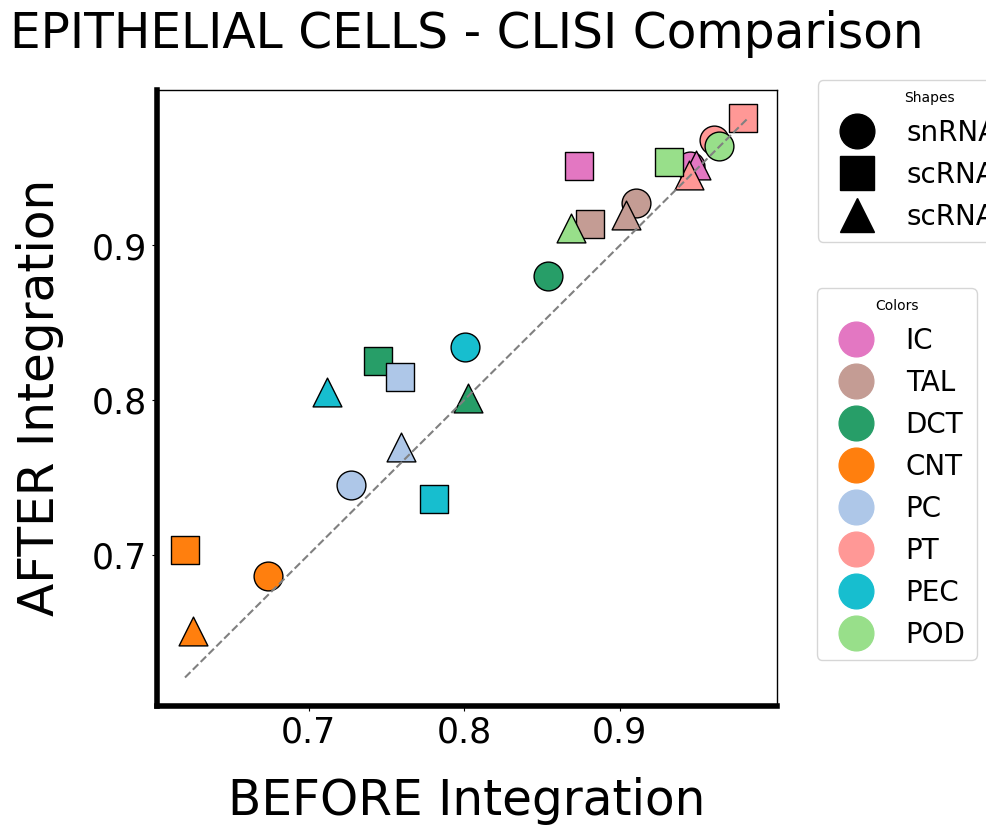

In [ ]:
techs_colors = {'snRNA': '#2ca02c',
 'scRNA5p': '#ff7f0e',
 'scRNA3p': '#1f77b4'}
shapes = ['o','s', '^', '*', 'D','d','P','1','2','3','4','8','p','+','x']  # Replace with your labels

mod_int = 'RNA_STWG'
latents = ['scVI']#,'Harmony','Unintegrated','Scanorama']
techs = ['snRNA','scRNA5p','scRNA']

color_keys = []
color_values = []
# colors = ['red','blue','green']
xvals=[]
yvals=[]
epi_cells = ['IC','TAL','DCT','CNT','PC','PT','PEC','POD']
for ct in epi_cells:

    # Create a scatter plot
    for n,col in enumerate(zip(averages_list1.columns,averages_list2.columns)):
        if averages_list1.loc[ct,col[0]] == 0 or averages_list2.loc[ct,col[1]] == 0:
            print()
            continue
        # print(colors[n],averages_list1.loc[ct,col])
        xvals.append(averages_list1.loc[ct,col[0]])
        yvals.append(averages_list2.loc[ct,col[0]])
        plt.scatter(averages_list1.loc[ct,col[0]], averages_list2.loc[ct,col[1]], color=l1_colors[ct],marker=shapes[n], s=430, linewidths=1, edgecolors='black')
    color_keys.append(ct)
    color_values.append(l1_colors[ct])

vmin = 0
vmax = 1
if np.min(xvals) < np.min(yvals):
    vmin = np.min(xvals)
else:
    vmin = np.min(yvals)
if np.max(xvals) > np.max(yvals):
    vmax = np.max(xvals)
else:
    vmax = np.max(yvals)
print(vmin,vmax)
plt.plot([vmin,vmax], [vmin, vmax], 'k--', label='45° line', color = 'grey')  # 'k--' is for a black dashed line

plt.title(f'EPITHELIAL CELLS - CLISI Comparison',fontsize="35", pad = 30)
plt.xlabel('BEFORE Integration',fontsize="35", labelpad= 20)
plt.ylabel(f'AFTER Integration',fontsize="35", labelpad=20)
plt.xticks(size=25)
plt.yticks(size=25)
ax = plt.gca()
plt.setp(ax.spines.values(), linewidth=4)
plt.gca().spines['top'].set_linewidth(1)     # Set the top spine line width
plt.gca().spines['right'].set_linewidth(1)     # Set the top spine line width

# plt.xlim((0,1))
# plt.ylim((0,1))
celltype = ct.replace('/','_')
color_legend = [mlines.Line2D([0], [0], color=color, marker='o', linestyle='', markersize=25) for color in list(color_values)]
ct_l3_list = dict_l3[ct]
# Create shape legend
shape_legend = [mlines.Line2D([0], [0], color='black', marker=shape, linestyle='', markersize=25) for shape in shapes]
shape_l = plt.legend(shape_legend, techs_colors.keys(), loc='lower right',bbox_to_anchor=(1.45, 0.73) ,title='Shapes', fontsize="20")
color_l = plt.legend(color_legend, color_keys, loc='upper left', title='Colors',bbox_to_anchor=(1.042, 0.7),fontsize="20")

# plt.legend(color_legend, colors.keys(), loc='upper left', title='Colors',bbox_to_anchor=(1.5, 0.5))
# plt.gca().add_artist(color_l)
plt.gca().add_artist(shape_l)
plt.xticks([0.7,0.8,0.9])
plt.yticks([0.7,0.8,0.9])
# plt.subplots_adjust(right=1.3)

plt.savefig(f'figures/CLISI/RNA/EPITHELIAL_{i}_{lt_mod}.png',bbox_extra_artists=(color_l, shape_l), bbox_inches='tight')

plt.show()

In [ ]:
# EXTRA - DOTPLOT FOR GENES IN Fig3G

In [ ]:
adata = sc.read('../HORIZONTAL_RNA/objects/RNA_STWG_final.h5ad')
adata

AnnData object with n_obs × n_vars = 97125 × 38224
    obs: 'sample', 'batch', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'Deepscore_external', 'Doublet_Detection_doublets_scRNA', 'Doublet_Detection_doublets_score_scRNA', 'Doublet_Detection_doublets_scRNA5p', 'Doublet_Detection_doublets_score_scRNA5p', 'AMULET_doublets', 'AMULET_pval', 'AMULET_qval', 'Doublet_Detection_doublets_snRNA', 'Doublet_Detection_doublets_score_snRNA', 'In_final_obj', 'Deepscore', 'Technology', 'Suspension_type', 'Study', 'Donor_id', 'Deepscore_HCA_l1_Clean', 'Deepscore_HCA_l1_full', 'Deepscore_HCA_l1_Clean_score', 'Deepscore_HCA_l1_Full', 'Deepscore_HCA_l1_Full_score', 'Deepscore_HCA_l3_Clean', 'Deepscore_HCA_l3_Clean_score', 'Deepscore_HCA_l3_Full', 'Deepscore_HCA_l3_Full_score', 'Deepscore_Muto', 'Deepscore_Muto_score', 'leiden_scVI_0.3', 'leiden_scVI_1.4', 'leiden_scVI_2', 'leiden_scVI_6', 'leiden_scVI_10', 'Manual_Annotation_l1',

In [ ]:
markers = [
    "TNFRSF17", "TLDC2", "TBX1", "SLC7A13", "SLC5A8", "S100A12", "PTP4A1", "PLCXD3", "PITPNC1",
    "PIK3C2G", "PIK3R1", "PIEZO2", "PHTF2", "PHACTR1", "PFKFB3", "PECAM1", "PDZK1IP1",
    "PDGFRB", "PDE10A", "PCOLCE2", "PCDH7", "PAPPA2", "PAPPA", "PALMD", "PAH", "NXPH2", "PLN",
    "PLAC9", "PLAU"
]

In [ ]:
sc.pp.normalize_total(adata, target_sum=10e4)
sc.pp.log1p(adata)

In [ ]:
sorted_celltypes = ['PT','TAL', 'PC', 'CNT', 'DCT','IC','PEC', 'POD','EC', 'FIB','VSM/P','IMM']

expression_data = adata.raw[:, markers].X.toarray()  # Use .X if not using raw
cell_types = adata.obs['Deepscore_HCA_l1_Clean']  # Replace with the actual column name

# Create a DataFrame for easier manipulation
df = pd.DataFrame(expression_data, columns=markers)
df['Deepscore_HCA_l1_Clean'] = cell_types.values

# Group by cell type and compute mean expression for each gene
avg_expression = df.groupby('Deepscore_HCA_l1_Clean')[markers].mean()

# Add a sorted column for ranking based on your list of cell types
avg_expression = avg_expression.reindex(sorted_celltypes)

# Determine the highest expressing cell type for each gene
gene_order = avg_expression.idxmax().sort_values(key=lambda x: [sorted_celltypes.index(i) for i in x])

/tmp/ipykernel_7262/1959680947.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_expression = df.groupby('Deepscore_HCA_l1_Clean')[markers].mean()


In [ ]:
ordered_genes = gene_order.index.tolist()
print("Ordered Genes:", ordered_genes)

Ordered Genes: ['PAH', 'SLC7A13', 'SLC5A8', 'PLAU', 'PAPPA2', 'PHACTR1', 'PAPPA', 'PDE10A', 'PHTF2', 'PFKFB3', 'PCDH7', 'PIK3C2G', 'PTP4A1', 'NXPH2', 'TLDC2', 'PIK3R1', 'PDZK1IP1', 'TBX1', 'PCOLCE2', 'PECAM1', 'PALMD', 'PITPNC1', 'PLCXD3', 'PLAC9', 'PIEZO2', 'PLN', 'PDGFRB', 'S100A12', 'TNFRSF17']


In [ ]:
adata = adata[adata.obs['Deepscore_HCA_l1_Clean']!='NEU']

In [ ]:
adata.obs['Deepscore_HCA_l1_Clean'] = adata.obs['Deepscore_HCA_l1_Clean'].cat.reorder_categories(sorted_celltypes)

/tmp/ipykernel_7262/219241542.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Deepscore_HCA_l1_Clean'] = adata.obs['Deepscore_HCA_l1_Clean'].cat.reorder_categories(sorted_celltypes)


In [ ]:
batch_mapper = {"scRNA" : 'scRNA3p',
  "scRNA5p" : 'scRNA5p',
  'snRNA' : 'snRNA',
  'snMultiome' : 'snMultiome'}
adata.obs['batch'] = adata.obs['batch'].map(batch_mapper)
adata.obs['celltype_batch'] = [i+'_'+j for i,j in zip(adata.obs['Deepscore_HCA_l1_Clean'],adata.obs['batch'])]

In [ ]:
celltype_batch_sorted = []
for i in sorted_celltypes:
    for j in ['snRNA','scRNA3p','scRNA5p']:
        celltype_batch_sorted.append(i+'_'+j)

In [ ]:
adata.obs['celltype_batch'] = adata.obs['celltype_batch'].astype('category')
adata.obs['celltype_batch'] = adata.obs['celltype_batch'].cat.reorder_categories(celltype_batch_sorted)

In [ ]:
rcParams['figure.figsize'] = 12,6


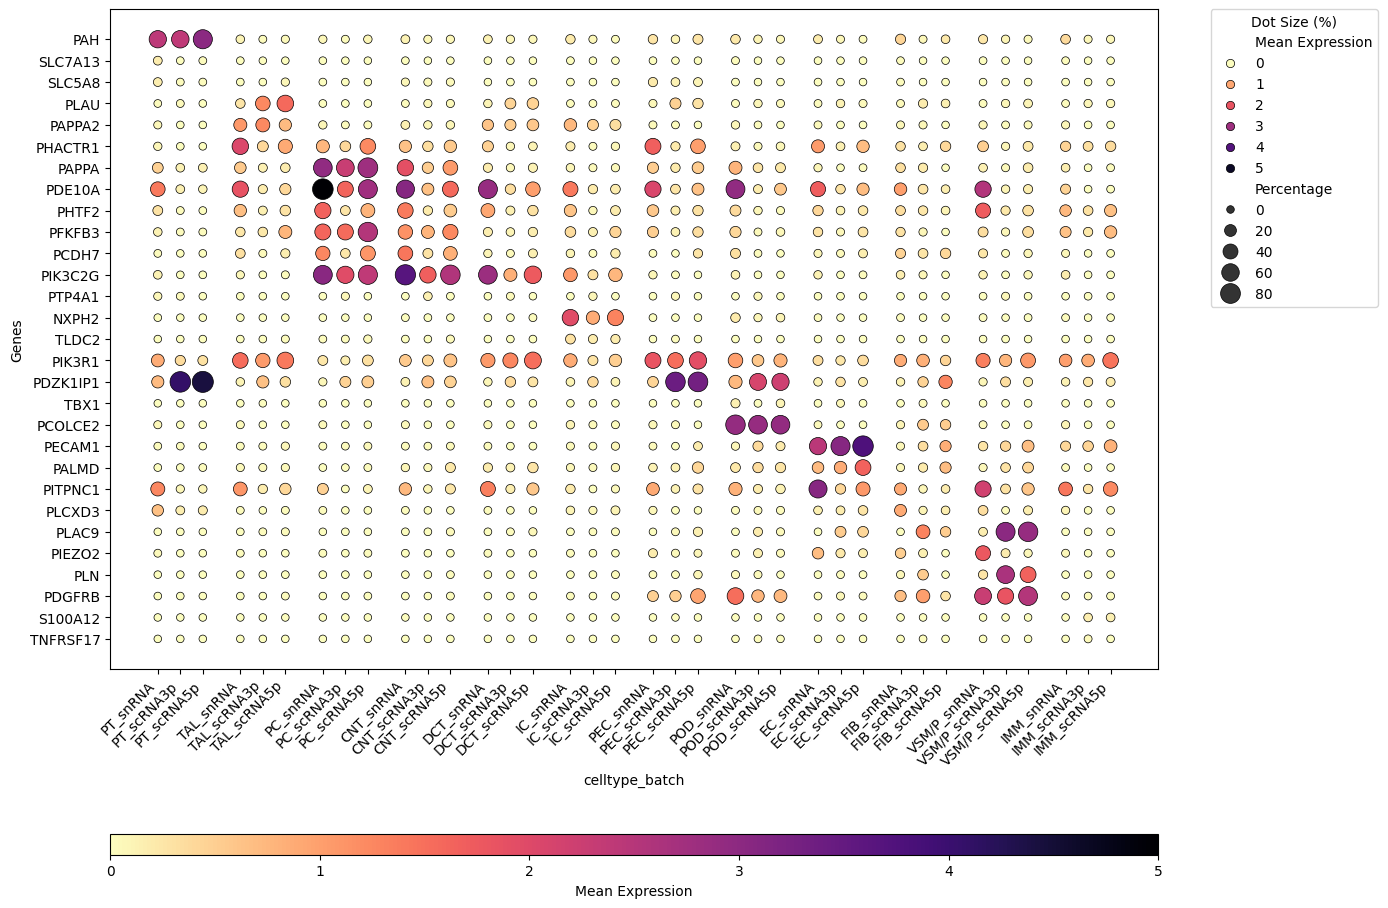

In [ ]:
import matplotlib as mpl

import matplotlib as mpl

def custom_dotplot(
    adata,
    var_names,
    groupby,
    category_order=None,
    figsize=(12, 6),
    cmap="coolwarm",
    short_padding=0.1,
    long_padding=0.5,
    x_padding_interval=3,
    dot_min=0.05,
    dot_max=1.0,
    only_expressed=False,
    vmax=None,
    vmin=None
):
    """
    Custom dot plot with legends adjusted and uniform padding.

    Parameters
    ----------
    adata : AnnData
        Annotated data matrix.
    var_names : list
        List of genes to include in the plot.
    groupby : str
        Column in `adata.obs` to group cells by.
    category_order : list, optional
        Custom order for x-axis tick labels.
    figsize : tuple
        Size of the figure.
    cmap : str
        Colormap for the dots.
    short_padding : float
        Short padding applied between adjacent x-axis entries.
    long_padding : float
        Large padding applied every `x_padding_interval`.
    x_padding_interval : int
        Frequency of applying the long padding.
    dot_min : float
        Minimum size for dots.
    dot_max : float
        Maximum size for dots.
    vmax : float
        Maximum value for the color scale.
    vmin : float
        Minimum value for the color scale.

    Returns
    -------
    None
    """
    # Compute the percentage of cells expressing each gene and the mean expression
    categories = adata.obs[groupby].unique()
    if category_order:
        categories_order = category_order
    else:
        categories_order = sorted(categories)

    percentages = pd.DataFrame(
        {
            cat: (adata[adata.obs[groupby] == cat, var_names].X > 0).mean(axis=0).A1 * 100
            for cat in categories_order
        },
        index=var_names,
    )
    if only_expressed==True:
            
        mean_expression = pd.DataFrame(index=var_names)

        for cat in categories_order:
            mean_values = []
            for gene in var_names:
                # Extract expression data for the current group and gene
                gene_data = adata[adata.obs[groupby] == cat, gene].raw.X
                
                # Filter out cells with zero expression
                expressed_values = gene_data[gene_data > 0]
                
                # Compute the mean expression for non-zero values
                if expressed_values.size > 0.0:
                    mean_values.append(expressed_values.mean())
                else:
                    mean_values.append(0)  # Assign 0 if no cells express the gene
                
            # Add the mean expression values for the current category
            mean_expression[cat] = mean_values
    else:
        mean_expression = pd.DataFrame(
        {
            cat: adata[adata.obs[groupby] == cat, var_names].X.mean(axis=0).A1
            for cat in categories_order
        },
        index=var_names,
        )
    # Create a melted DataFrame for plotting
    data_for_plot = percentages.reset_index().melt(
        id_vars="index", var_name="Category", value_name="Percentage"
    )
    data_for_plot["Mean Expression"] = mean_expression.reset_index().melt(
        id_vars="index", var_name="Category", value_name="Expression"
    )["Expression"]

    # Adjust x positions with uniform padding
    x_positions = np.arange(len(categories_order))
    for i in range(1, len(x_positions)):
        if i % x_padding_interval == 0:
            x_positions[i:] = x_positions[i:] + long_padding
        else:
            x_positions[i:] = x_positions[i:] + short_padding

    # Map categories to x positions
    category_to_x = dict(zip(categories_order, x_positions))
    data_for_plot["x"] = data_for_plot["Category"].map(category_to_x)

    # Plot using seaborn scatterplot
    plt.figure(figsize=figsize)
    scatter_plot = sns.scatterplot(
        data=data_for_plot,
        x="x",
        y="index",
        size="Percentage",
        sizes=(dot_min, dot_max),
        hue="Mean Expression",
        palette=cmap,
        edgecolor="black",
        linewidth=0.5,
    )

    # Adjust plot aesthetics
    scatter_plot.set_xticks(x_positions)
    scatter_plot.set_xticklabels(categories_order, rotation=45, ha="right")
    scatter_plot.set_ylabel("Genes")
    scatter_plot.set_xlabel(groupby)

    # Add dot size legend outside the plot
    handles, labels = scatter_plot.get_legend_handles_labels()
    size_legend_handles = handles[:len(percentages.columns)]  # Size legend only
    size_legend_labels = labels[:len(percentages.columns)]

    scatter_plot.legend_.remove()  # Remove default legend
    plt.legend(
        handles=size_legend_handles,
        labels=size_legend_labels,
        title="Dot Size (%)",
        bbox_to_anchor=(1.05, 1),
        loc="upper left",
        borderaxespad=0,
    )

    # Add horizontal colorbar for Mean Expression on the right
    norm = mpl.colors.Normalize(vmin=0, vmax=vmax)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])

    cbar = plt.colorbar(
        sm,
        ax=scatter_plot,
        orientation="horizontal",
        pad=0.17,
        aspect=50
    )
    cbar.set_label("Mean Expression")

    plt.tight_layout()
    # plt.show()
    return data_for_plot
data = custom_dotplot(
    adata=adata,
    var_names=ordered_genes, 
    groupby='celltype_batch', 
    category_order=celltype_batch_sorted,  # Custom order for x-ticks
    figsize=(14, 10),
    cmap="magma_r",
    short_padding=2.5,
    long_padding=4,
    x_padding_interval=3,
    dot_min=30,
    dot_max=230,
    vmax=5.0
)
plt.savefig('figures/3G_genes_DOTPLOT.png', dpi=600, bbox_inches='tight')
plt.savefig('figures/3G_genes_DOTPLOT.pdf', dpi=600, bbox_inches='tight')

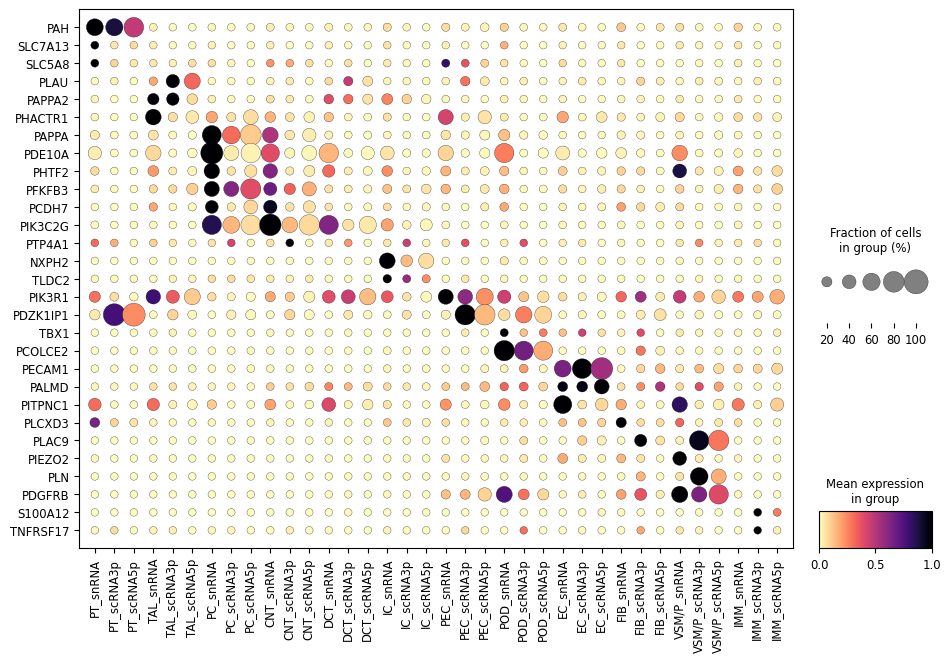

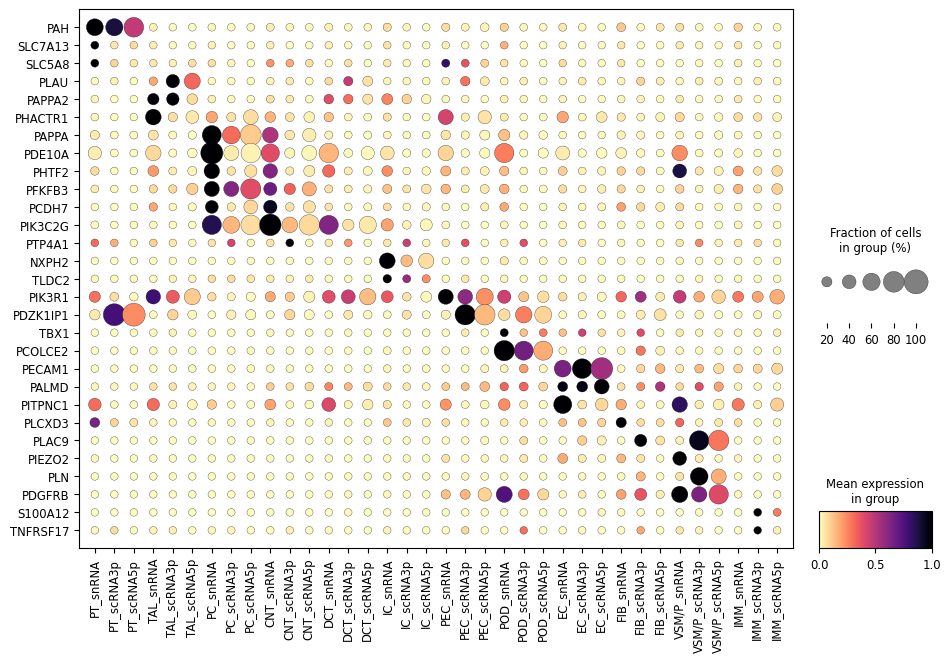

In [ ]:
dotplot = sc.pl.dotplot(              
    adata, 
    var_names=ordered_genes, 
    groupby='celltype_batch', 
    swap_axes=True,  
    cmap='bwr',
    standard_scale='var',figsize=(11, 7),return_fig=True, vmax=1  # This returns the DotPlot object for further customization
)
# Adjust the minimum dot size
dotplot.style(
    largest_dot=300,
    smallest_dot=30,cmap='magma_r'
)
dotplot.savefig('figures/GENES_Fig3G.png', dpi=600, bbox_inches = 'tight')
dotplot.savefig('figures/GENES_Fig3G.pdf', dpi=600, bbox_inches = 'tight')

